In [1]:
import dimspy
import os
import cPickle as pickle

data_directory = "/home/keo7/Data/dimspy-example/"

In [ ]:
spectrum_list = dimspy.SpectrumList()

parameters = {
    "MS1 Precision" : 1e-6,
    "MSn Precision" : 1e-6,
    "Measured Precision" : 0.01,
    "Scan Range" : "apex",
    "Peak Type" : "peaks"
}

for index, file in enumerate(os.listdir(data_directory)):
    if file.endswith(".p"):
        pass
    else:
        spectrum = dimspy.Spectrum(os.path.join(data_directory, file),
                                   polarity="positive",
                                   injection_order=index,
                                   parameters=parameters)
        spectrum_list.append(spectrum)

In [ ]:
pickle.dump(spectrum_list, open(os.path.join(data_directory, "sl.p"), "wb"), -1)

In [2]:
spectrum_list = pickle.load(open(os.path.join(data_directory, "sl.p"), "rb"))

In [ ]:
spectrum_list.to_list()

In [ ]:
for spectrum in spectrum_list.to_list():
    spectrum.plot(scaled=True)
    break

In [3]:
processor = dimspy.SpectrumListProcessor(spectrum_list)

dimspy/SpectrumListProcessor.py:56: UserWarning:

Outlier detection removed: ctrl02



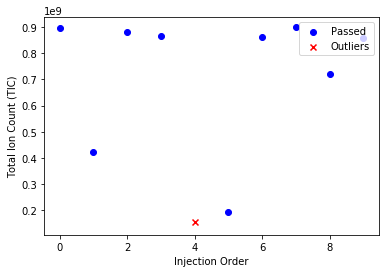

In [4]:
processor.outlier_detection(plot=True, mad_threshold=2)

In [ ]:
for spectrum in processor.to_list():
    print spectrum.id

In [ ]:
for i in processor.to_list():
    i.transform()
    i.normalise()

In [5]:
processor.binning(bin_size=0.25, n_jobs=16, statistic="mean", inplace=True)

In [6]:
processor.center(n_jobs=16)

In [7]:
processor.value_imputation(threshold=0.85)

In [8]:
p_sl = processor.to_spectrumlist()

In [10]:
df = p_sl.flatten_to_dataframe()

In [ ]:
p_sl.to_csv("/tmp/out.csv")

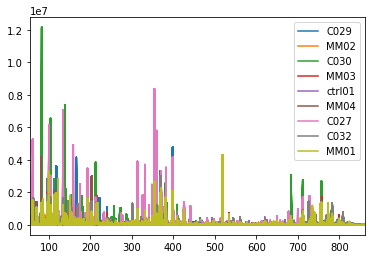

In [12]:
import matplotlib.pyplot as plt
plt.figure()
df.T.plot()
plt.show()